In [31]:
import duckdb
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('realtor_data.csv')
duckdb.sql("select count(*) from df")

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│      2226382 │
└──────────────┘

In [45]:
duckdb.sql("select max(price) from df")

┌──────────────┐
│  max(price)  │
│    double    │
├──────────────┤
│ 2147483600.0 │
└──────────────┘

In [46]:
duckdb.sql("select min(price) from df")

┌────────────┐
│ min(price) │
│   double   │
├────────────┤
│        0.0 │
└────────────┘

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [34]:
print(df.describe())

        brokered_by         price           bed          bath      acre_lot  \
count  2.221849e+06  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06   
mean   5.293989e+04  5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01   
std    3.064275e+04  2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    2.386100e+04  1.650000e+05  3.000000e+00  2.000000e+00  1.500000e-01   
50%    5.288400e+04  3.250000e+05  3.000000e+00  2.000000e+00  2.600000e-01   
75%    7.918300e+04  5.500000e+05  4.000000e+00  3.000000e+00  9.800000e-01   
max    1.101420e+05  2.147484e+09  4.730000e+02  8.300000e+02  1.000000e+05   

             street      zip_code    house_size  
count  2.215516e+06  2.226083e+06  1.657898e+06  
mean   1.012325e+06  5.218668e+04  2.714471e+03  
std    5.837635e+05  2.895408e+04  8.081635e+05  
min    0.000000e+00  0.000000e+00  4.000000e+00  
25%    5.063128e+05  2.961700e+04  1.3

In [35]:
df_cleaned = df.dropna(subset=['price', 'bed', 'bath', 'city', 'state'])

In [36]:
df_cleaned['zip_code'] = df_cleaned['zip_code'].astype(str)

C:\Users\juanga\AppData\Local\Temp\ipykernel_19224\626712459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['zip_code'] = df_cleaned['zip_code'].astype(str)


In [37]:
duckdb.sql("select count(*) from df_cleaned")

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│      1703994 │
└──────────────┘

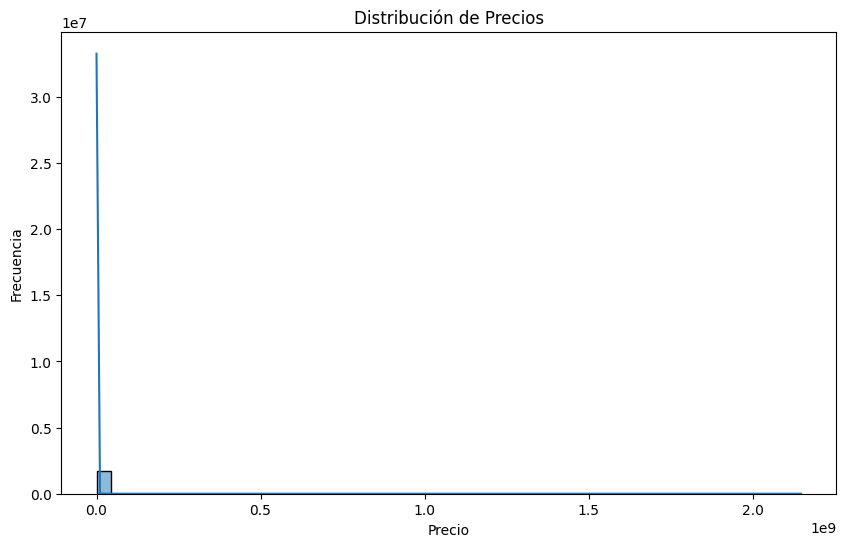

In [38]:
# Histograma del precio
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

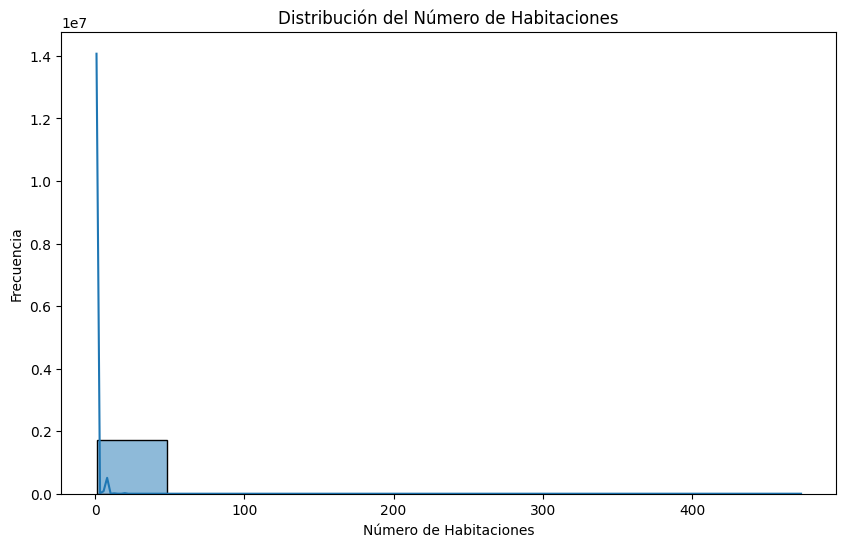

In [39]:
# Histograma del número de habitaciones
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['bed'], bins=10, kde=True)
plt.title('Distribución del Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Frecuencia')
plt.show()

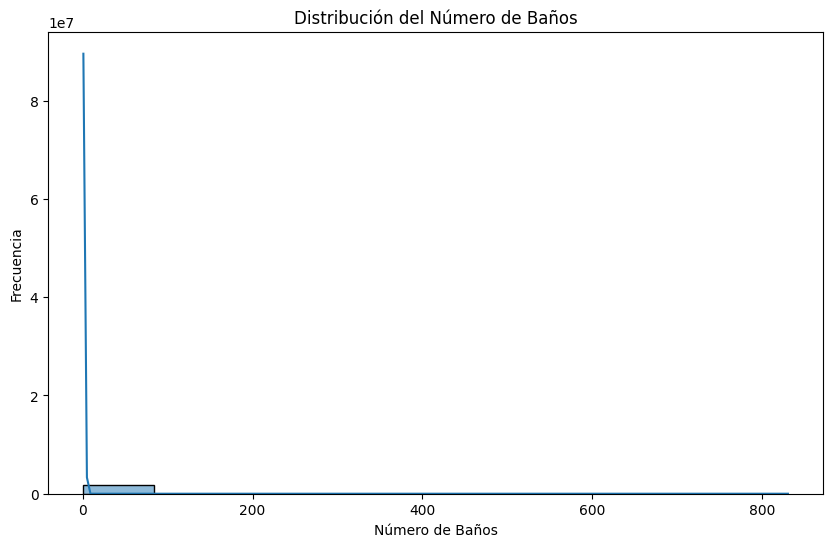

In [40]:
# Histograma del número de baños
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['bath'], bins=10, kde=True)
plt.title('Distribución del Número de Baños')
plt.xlabel('Número de Baños')
plt.ylabel('Frecuencia')
plt.show()

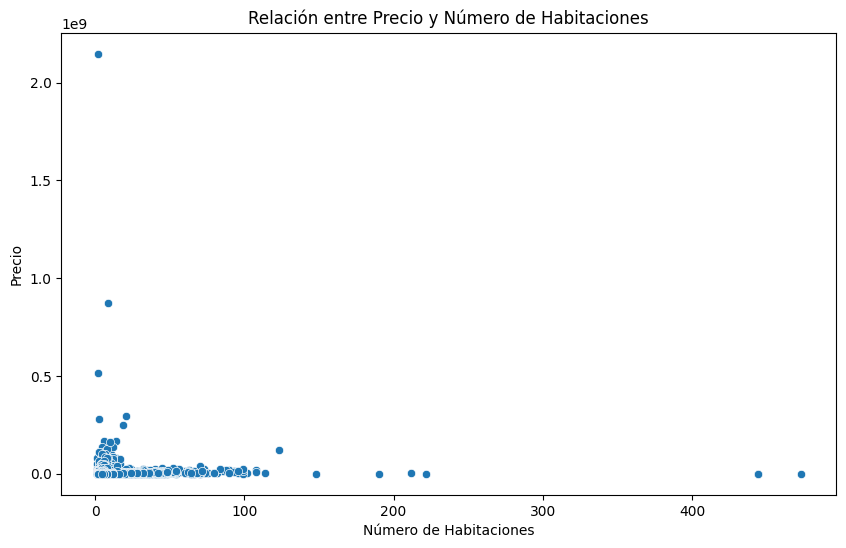

In [41]:
# Relación entre precio y número de habitaciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bed', y='price', data=df_cleaned)
plt.title('Relación entre Precio y Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')
plt.show()

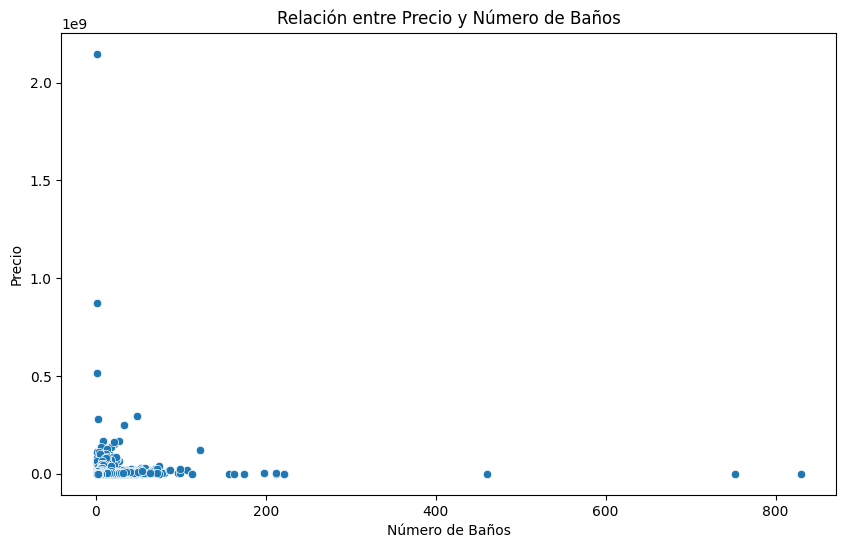

In [42]:
# Relación entre precio y número de baños
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bath', y='price', data=df_cleaned)
plt.title('Relación entre Precio y Número de Baños')
plt.xlabel('Número de Baños')
plt.ylabel('Precio')
plt.show()

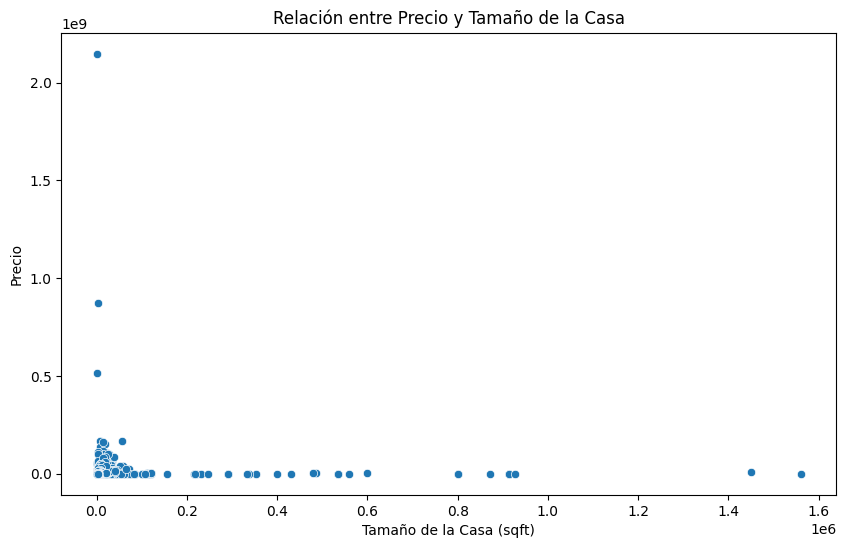

In [43]:
# Relación entre precio y tamaño de la casa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_size', y='price', data=df_cleaned)
plt.title('Relación entre Precio y Tamaño de la Casa')
plt.xlabel('Tamaño de la Casa (sqft)')
plt.ylabel('Precio')
plt.show()